# PCA去噪

## 之前我们自己随机创造数据的例子

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 5, size=100)

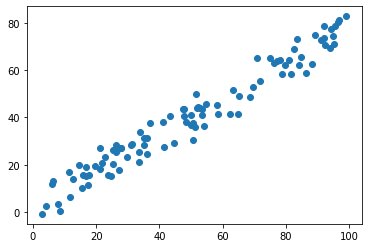

In [3]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [4]:
from sklearn.decomposition import PCA

In [5]:
pca = PCA(n_components=1)

In [6]:
pca.fit(X)
X_reduction = pca.transform(X)
X_restore = pca.inverse_transform(X_reduction)

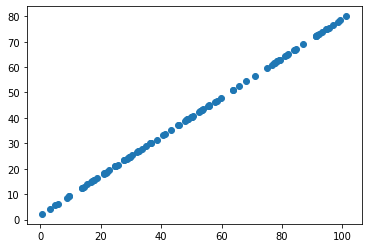

In [7]:
'''降维的过程可以看成是去噪，可以看到原来离散的数据都聚集到主成分向量上了'''
plt.scatter(X_restore[:,0], X_restore[:,1])
plt.show()

## 手写识别的例子

In [10]:
from sklearn import datasets

In [11]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [12]:
'''人为创造噪音'''
noisy_digits = X + np.random.normal(0, 4, size=X.shape)

In [13]:
'''取出部分数据进行可视化展示(再添加了噪音的情况下)'''
example_digits = noisy_digits[y==0,:][:10]
for num in range(1,10):
    example_digits = np.vstack([example_digits, noisy_digits[y==num,:][:10]])

In [14]:
example_digits.shape

(100, 64)

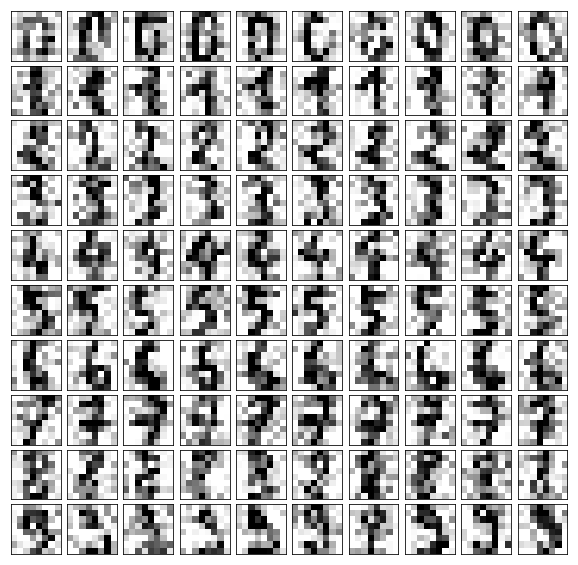

In [15]:
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10),
                             subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

    plt.show()
    
plot_digits(example_digits)

In [16]:
'''PCA降噪'''
pca = PCA(0.5).fit(noisy_digits) # 只保留50%的数据，丢失了数据的情况下反而起到了降噪的效果
pca.n_components_

12

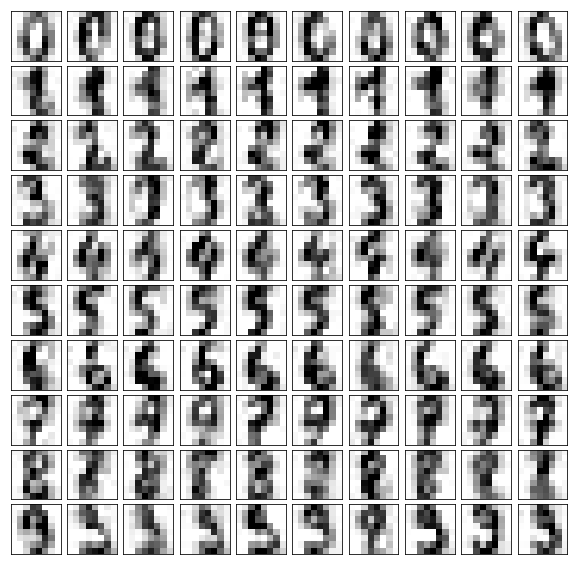

In [17]:
components = pca.transform(example_digits)
filtered_digits = pca.inverse_transform(components)
plot_digits(filtered_digits)

图片明显清晰很很多